# Random Forest Classification - Fraud Data

## data dictionary

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF 
from feature_engine.outliers import Winsorizer
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [18]:
df=pd.read_csv("C:/Users/delll/Desktop/Python/DataSets/Fraud_check.xls")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [19]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [21]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [22]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [23]:
for i in df["Taxable.Income"]:
    if i<=30000:
        df["Taxable.Income"]=np.where(df["Taxable.Income"]==i,0,df["Taxable.Income"])
    else:
        df["Taxable.Income"]=np.where(df["Taxable.Income"]==i,1,df["Taxable.Income"])

In [24]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO


In [25]:
df["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [26]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

## Univariate analysis

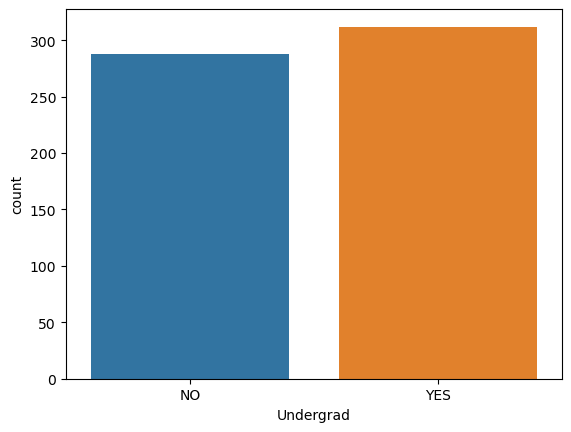

In [27]:
sns.countplot(x=df["Undergrad"])
plt.show()

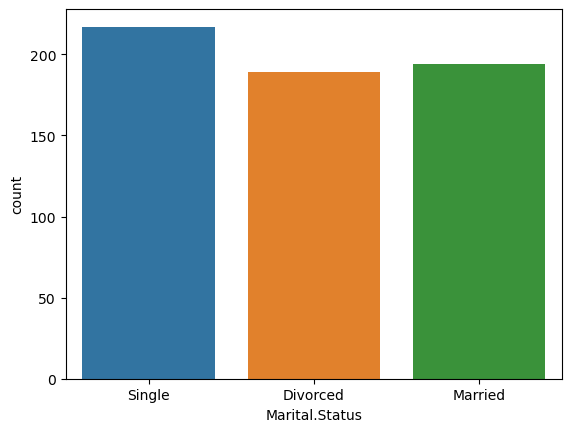

In [28]:
sns.countplot(x=df["Marital.Status"])
plt.show()

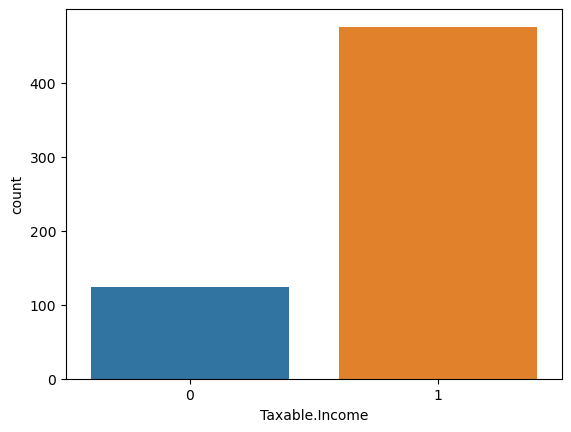

In [29]:
sns.countplot(x=df["Taxable.Income"])
plt.show()

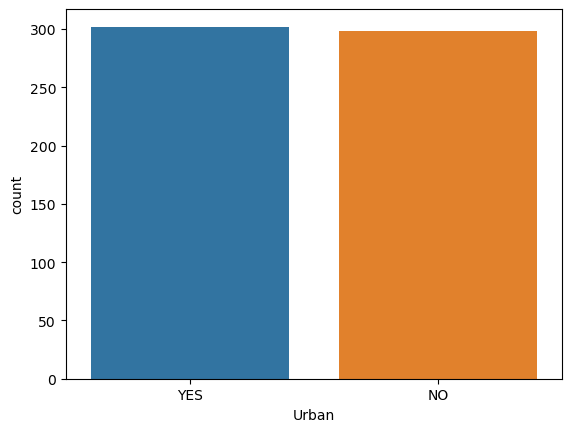

In [30]:
sns.countplot(x=df["Urban"])
plt.show()

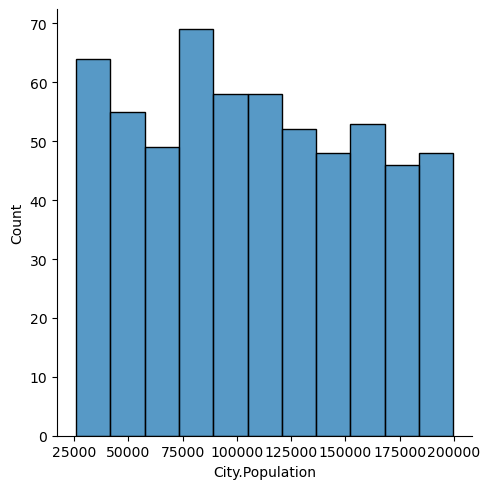

In [31]:
sns.displot(x=df["City.Population"])
plt.show()

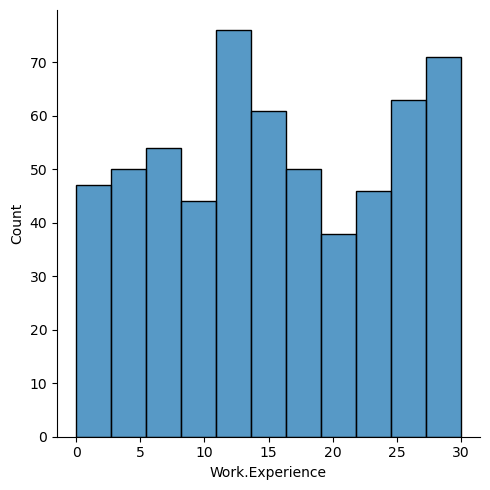

In [32]:
sns.displot(df["Work.Experience"])
plt.show()

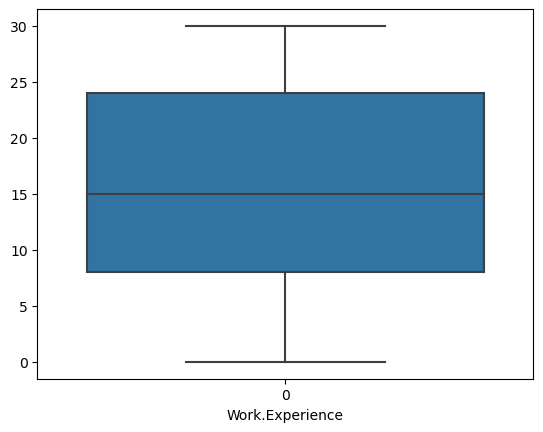

In [33]:
sns.boxplot(df["Work.Experience"])
plt.xlabel("Work.Experience")
plt.show()

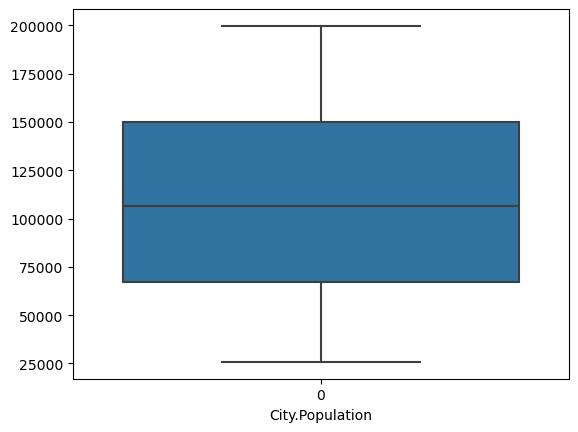

In [34]:
sns.boxplot(df["City.Population"])
plt.xlabel("City.Population")
plt.show()

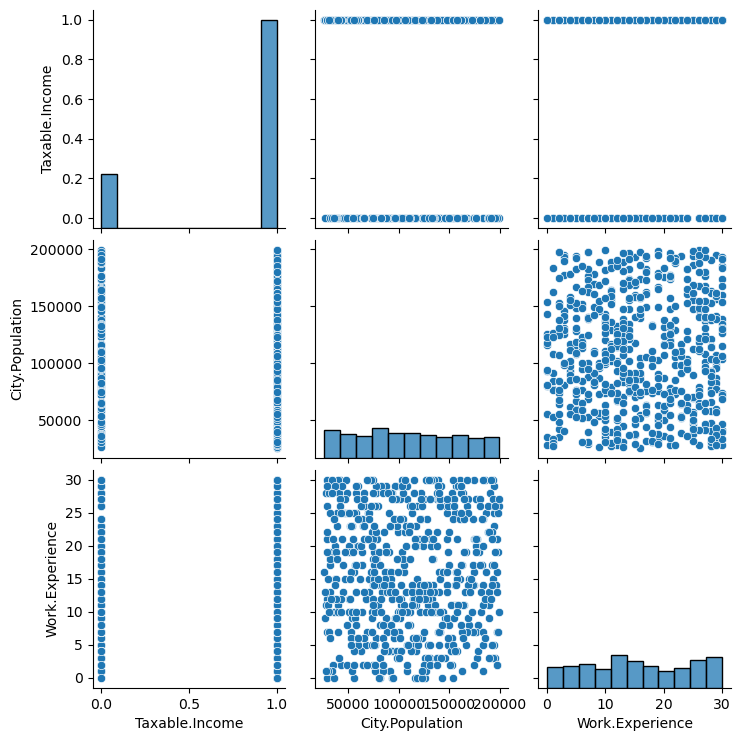

In [35]:
sns.pairplot(df)
plt.show()

In [36]:
le=LabelEncoder()
df["Undergrad"]=le.fit_transform(df["Undergrad"])
df["Marital.Status"]=le.fit_transform(df["Marital.Status"])
df["Urban"]=le.fit_transform(df["Urban"])

In [37]:
inputs=df.drop(["Taxable.Income"],axis=1)
target=df["Taxable.Income"]

In [38]:
inputs.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [39]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)

In [40]:
model=RF()
model.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [42]:
cm=confusion_matrix(y_test,y_pred)

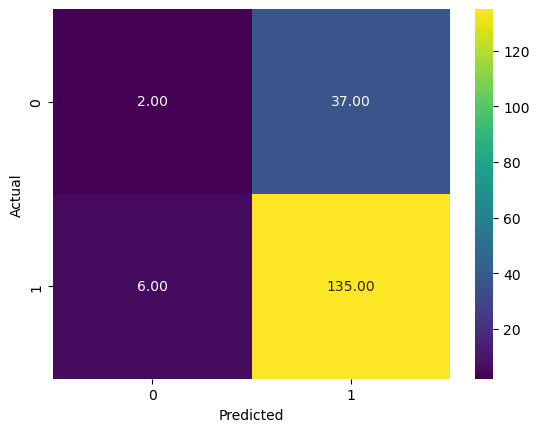

In [43]:
sns.heatmap(cm,annot=True,cmap="viridis",fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [44]:
acc=accuracy_score(y_test,y_pred)
acc

0.7611111111111111

## Conclusion